
# Project: Investigate No-show Appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

A number of characteristics about the patient are included in each row:

- 'ScheduledDay' tells us on what day the patient set up their appointment.
- 'Neighborhood' indicates the location of the hospital.
- 'Scholarship' indicates whether or not the patient is enrolled in Brasilian welfare program "Bolsa Família".

Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

Depending on the dataset We will try to answer the following questions:

- What is the relation between different chronic diseases and no-show appointments?
- What is the effect of the age and gender on the no-show?
- What is the relation between the neighbourhood and the no-show?
- Which factor affects the no-show appointments the most?

In this notebook I will look at the following 2 questions:

- How do the chronic diseases and alcoholism affect the no-show appointments?
- What is the relation between , age, gender, scholarship , neighbourhood and the no-show appointments?


In [13]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df. shape

(110527, 14)

- Rows 110527
- Columns 14

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No Missing Data 

In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- Maximum Age is 115
- Minimun Age is -1, There is a mistake with one patient age.
- Average Age is 37


### Data Cleaning 

In [11]:
# Correcting "Hipertension" Spelling

df.rename(columns={'Hipertension': 'Hypertension'}, inplace= True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# Dropping columns that won't be needed in the data analysis.

df.drop(['AppointmentID', 'PatientId', 'AppointmentDay','ScheduledDay'], axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Renaming No-show column
df.rename(columns={'No-show': 'No_show'}, inplace= True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis



### Histogram of the whole dataset

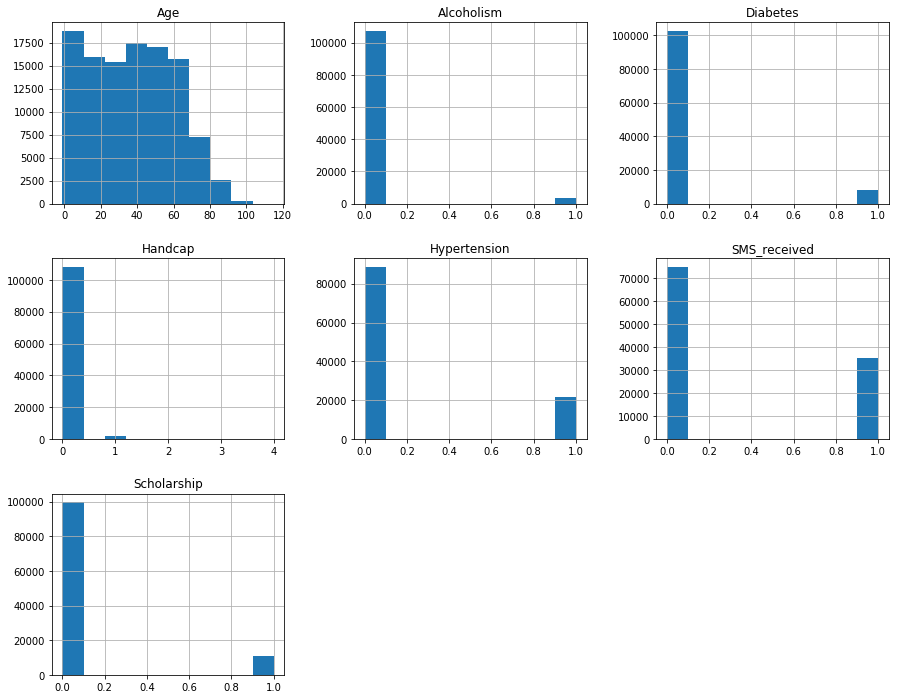

In [14]:
# Histogram of the dataset
df.hist(figsize = (15,12));

- Most patients aren't enrolled in Brasilian welfare program
- Most patients don't suffer from diabetes, alcoholism, or handcap.
- About 20.000 are suffering from hypertension.
- About 50% didn't recieve a SMS.


In [15]:
df['No_show'].value_counts(sort=True)

No     88208
Yes    22319
Name: No_show, dtype: int64

- 88208 Showed at the clinic 
- 22319 Didn't show at the clinic

In [7]:
show = df.No_show == 'No'
noshow = df.No_show == 'Yes'

In [19]:
df[show].count()

Gender           88208
Age              88208
Neighbourhood    88208
Scholarship      88208
Hypertension     88208
Diabetes         88208
Alcoholism       88208
Handcap          88208
SMS_received     88208
No_show          88208
dtype: int64

- 88208 patient showed at the clinic

In [21]:
df[noshow].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
No_show          22319
dtype: int64

In [24]:
print(df.Gender[show].value_counts())

F    57246
M    30962
Name: Gender, dtype: int64


In [34]:
print(df.Gender[noshow].value_counts())

F    14594
M     7725
Name: Gender, dtype: int64


- 22319 Didn't showed at the clinic


###  Research Question 1: What is the relation between , age, gender, scholarship , neighbourhood and the no-show appointments?


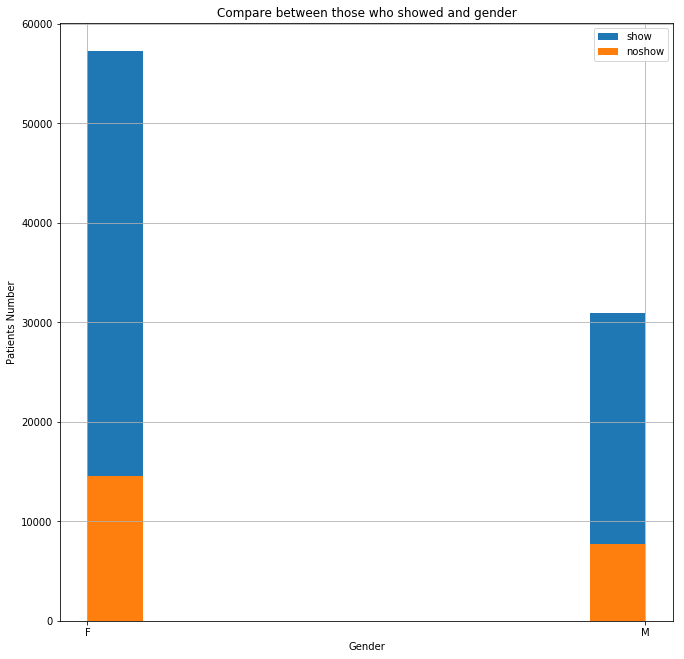

In [46]:
plt.figure(figsize = [11, 11])
df.Gender[show].hist(label = 'show')
df.Gender[noshow].hist(label = 'noshow')
plt.legend()
plt.title('Compare between those who showed and gender')
plt.xlabel('Gender')
plt.ylabel('Patients Number');

There isn't a clear relation between the gender and no-show. So, gender don't affect the showing at the clinic

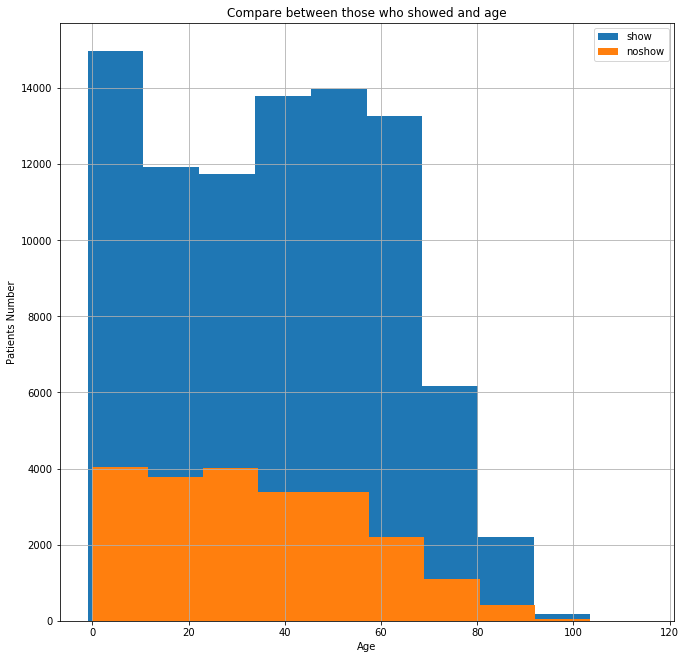

In [45]:
plt.figure(figsize = [11, 11])
df.Age[show].hist(label = 'show')
df.Age[noshow].hist(label = 'noshow')
plt.legend()
plt.title('Compare between those who showed and age')
plt.xlabel('Age')
plt.ylabel('Patients Number');


Patients between 0 to 10 years showed more than patients in other ages, also the older ages the no-shows dropped. Age affects no-shows.



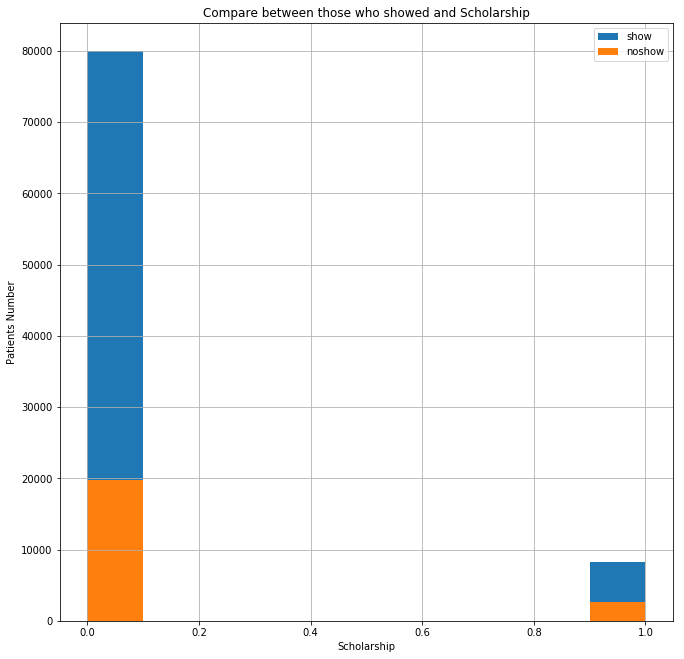

In [50]:
plt.figure(figsize = [11, 11])
df.Scholarship[show].hist(label = 'show')
df.Scholarship[noshow].hist(label = 'noshow')
plt.legend()
plt.title('Compare between those who showed and Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('Patients Number');

Most patients don't enroll in Brasilian welfare program "Bolsa Família". And enrolling in Brasilian welfare program has no clear effect on no-shows.

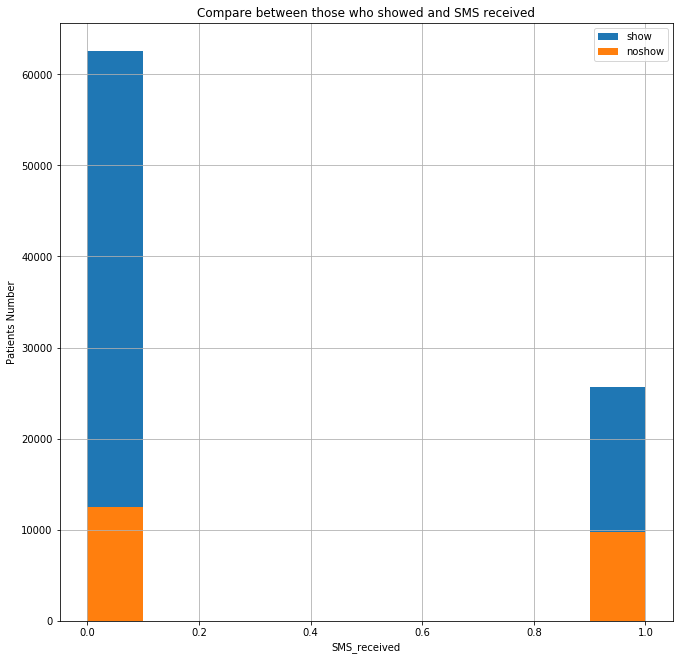

In [51]:
plt.figure(figsize = [11, 11])
df.SMS_received[show].hist(label = 'show')
df.SMS_received[noshow].hist(label = 'noshow')
plt.legend()
plt.title('Compare between those who showed and SMS received')
plt.xlabel('SMS_received')
plt.ylabel('Patients Number');

Most patients showed up without receiving SMS and this seems strange!

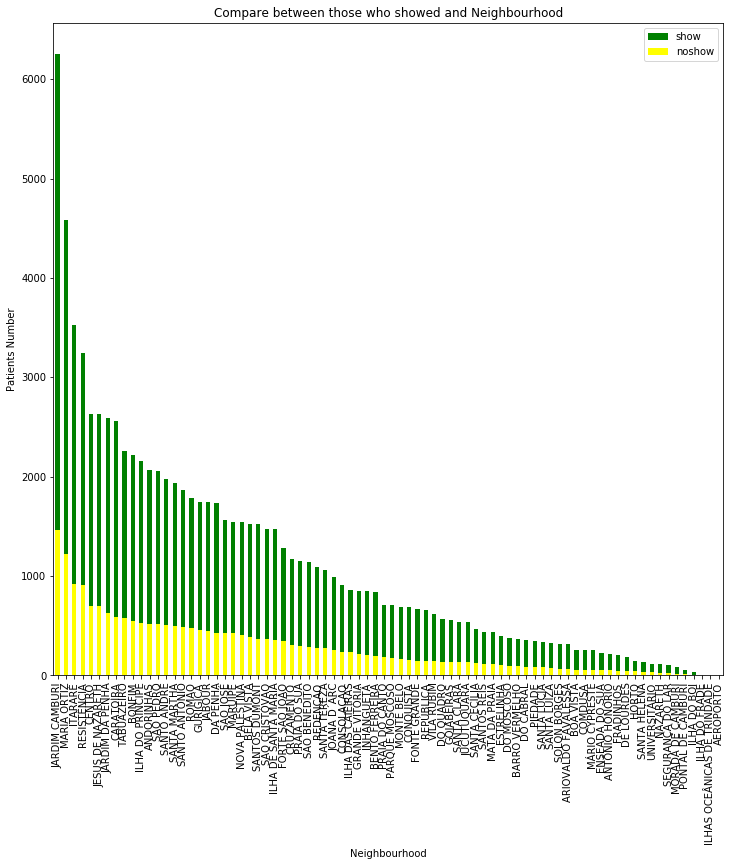

In [14]:
plt.figure(figsize = [12, 12])
df.Neighbourhood[show].value_counts().plot(kind = 'bar', color = 'green', label = 'show')
df.Neighbourhood[noshow].value_counts().plot(kind = 'bar', color = 'yellow', label = 'noshow')
plt.legend()
plt.title('Compare between those who showed and Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

Neighbourhood strongly affect the no-shows. Neighbourhood appers to be a determining factor in no-shows


###  Research Question 2: How do the chronic diseases and alcoholism affect the no-show appointments?


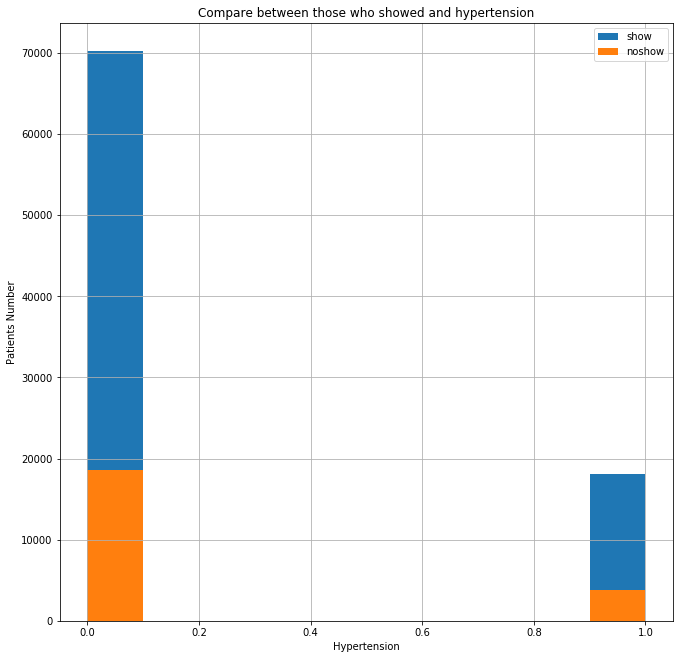

In [56]:
plt.figure(figsize = [11, 11])
df.Hypertension[show].hist(label = 'show')
df.Hypertension[noshow].hist(label = 'noshow')
plt.legend()
plt.title('Compare between those who showed and hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Patients Number');

- Hypertension don't affect the no-shows

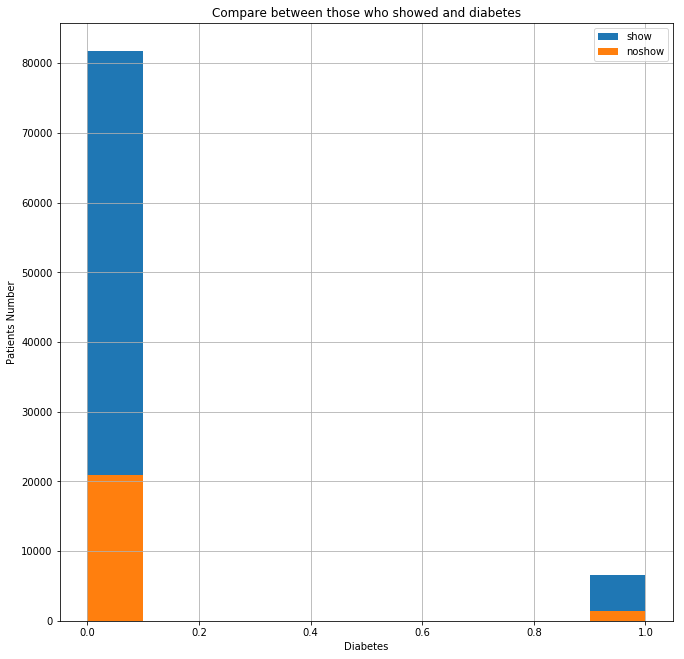

In [55]:
plt.figure(figsize = [11, 11])
df.Diabetes[show].hist(label = 'show')
df.Diabetes[noshow].hist(label = 'noshow')
plt.legend()
plt.title('Compare between those who showed and diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Patients Number');

- Diabetes don't have a clear effect in no-shows.

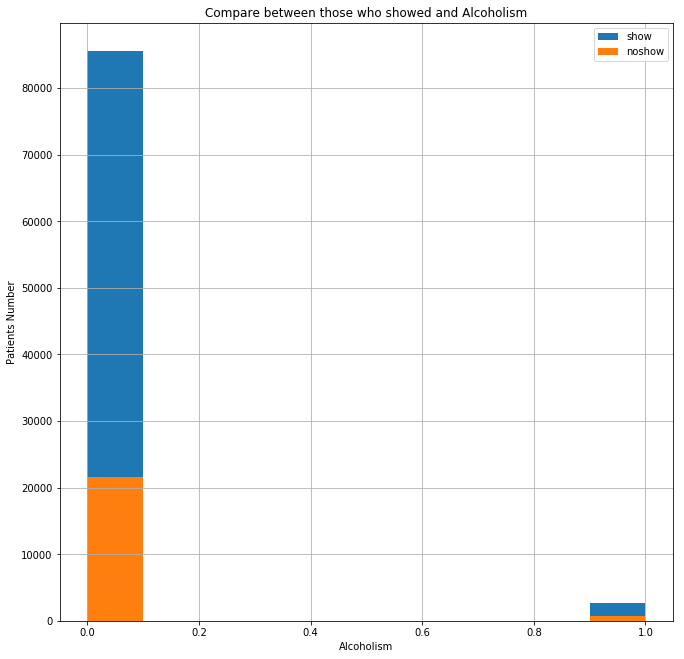

In [48]:
plt.figure(figsize = [11, 11])
df.Alcoholism[show].hist(label = 'show')
df.Alcoholism[noshow].hist(label = 'noshow')
plt.legend()
plt.title('Compare between those who showed and Alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('Patients Number');

Alcoholism don't have a clear effect in no-shows. 

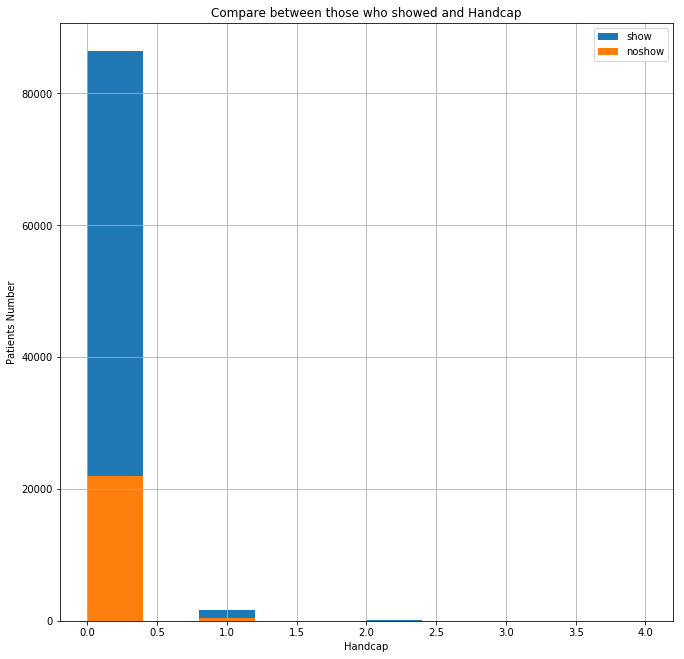

In [49]:
plt.figure(figsize = [11, 11])
df.Handcap[show].hist(label = 'show')
df.Handcap[noshow].hist(label = 'noshow')
plt.legend()
plt.title('Compare between those who showed and Handcap')
plt.xlabel('Handcap')
plt.ylabel('Patients Number');

- Handcap don't affect the showing at the clinic

<a id='conclusions'></a>
## Conclusions

- Neighbourhood affects the no-shows and patient's showing at the clinic.
- Age appears as determining factor in the no-shows. 
- Enrolling in scholarship dose not make patients to show up to the appointment.
- Higher precentage of patients that received SMS didn't show up comparing to patients who received SMS and showed up at the appointment.

Limitations: 

- Cannot detect a direct correlation between factors like gender, schoplarship, chronic diseases and no-shows.
- More patients showed up without receiving SMS, which seemed strange! but we don't have enough details to draw conclusion.
- Most of the data are categorical.



In [15]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0